<a href="https://colab.research.google.com/github/asushalaev/DataSciencePortfolio/blob/main/DataSciencePortfolioProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ingest


Subject: Covid data from New York Time Github

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")

Check first Rows

In [2]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Check Last Rows

In [3]:
df.tail()

,date,state,fips,cases,deaths
49505,2022-08-13,Virginia,51,1993874,21145
49506,2022-08-13,Washington,53,1761081,13872
49507,2022-08-13,West Virginia,54,567426,7203
49508,2022-08-13,Wisconsin,55,1803143,14980
49509,2022-08-13,Wyoming,56,172473,1865


In [4]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [5]:
df.shape

(49510, 5)

## Exploratory Data Analisys

What are general characteristics of the data? A good way to find out is df.describe

In [6]:
df.describe()

,fips,cases,deaths
count,49510.000000,4.951000e+04,49510.000000
mean,32.175702,6.696457e+05,9866.460109
std,18.758343,1.148182e+06,15135.783284
min,1.000000,1.000000e+00,0.000000
25%,17.000000,4.792750e+04,792.000000
50%,31.000000,2.538970e+05,3876.000000
75%,46.000000,8.006480e+05,12372.000000
max,78.000000,1.089855e+07,94234.000000


Cases and Deaths in the USA due to Covid-19

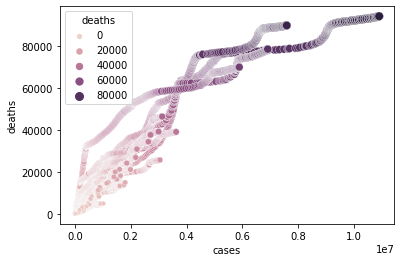

In [7]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths", 
                hue="deaths",size="deaths", data=df)

In [10]:
sns.catplot(x="cases", y="deaths", kind="swarm", data=df)

KeyboardInterrupt: ignored

Dealing with dates by setting index

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2022-08-13', '2022-08-13', '2022-08-13', '2022-08-13',
               '2022-08-13', '2022-08-13', '2022-08-13', '2022-08-13',
               '2022-08-13', '2022-08-13'],
              dtype='datetime64[ns]', name='date', length=49510, freq=None)

Filter results by date range

In [12]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 2)
print(f"Today {today}")
print(f"Two days ago {daybefore}") 

Today 2022-08-14
Two days ago 2022-08-12


In [13]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2022-08-12,Alabama,1,1449812,20026
2022-08-12,Alaska,2,293074,1290
2022-08-12,American Samoa,60,8042,33
2022-08-12,Arizona,4,2224964,30901
2022-08-12,Arkansas,5,915733,11812


The distribution of the data by date

ValueError: ignored

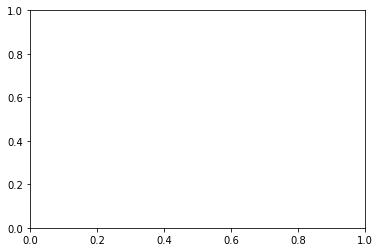

In [14]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], shade=True)

In [15]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2022-08-12,California,6,10898548,94234
2022-08-13,California,6,10898548,94234
2022-08-12,Texas,48,7588881,89859
2022-08-13,Texas,48,7588881,89859
2022-08-12,Florida,12,6909416,78559
2022-08-13,Florida,12,6909416,78559
2022-08-13,New York,36,5891418,69976
2022-08-12,New York,36,5888845,69976
2022-08-12,Pennsylvania,42,3131000,46398


In [16]:
current_df.shape

(112, 4)

State Based Analysis

In [35]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['California',
 'California',
 'Texas',
 'Texas',
 'Florida',
 'Florida',
 'New York',
 'New York',
 'Pennsylvania',
 'Pennsylvania']

In [36]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

In [37]:
set(top_states_df.state.values)

{'California', 'Florida', 'New York', 'Pennsylvania', 'Texas'}

<Figure size 1080x360 with 0 Axes>

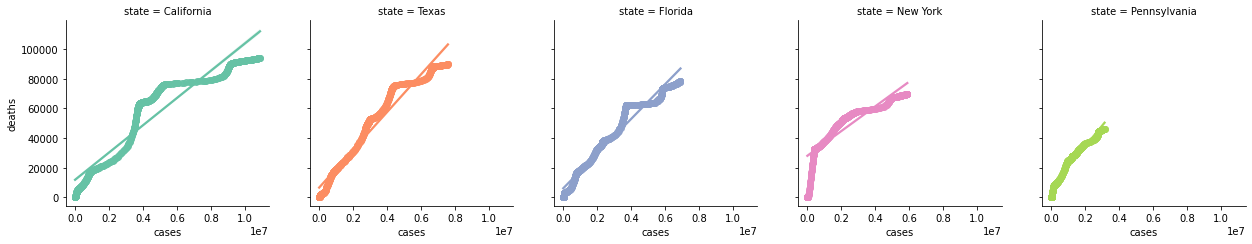

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state", 
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

In [22]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,Pennsylvania,6,0
2020-03-09,Pennsylvania,10,0
2020-03-10,Pennsylvania,12,0
2020-03-11,Pennsylvania,16,0
2020-03-12,Pennsylvania,22,0


In [23]:
import plotly.io as pio
pio.renderers.default = 'colab'
import plotly.express as px
fig = px.scatter(top_states_march_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
fig.show()

In [24]:
cdc_2013 = pd.read_csv("https://raw.githubusercontent.com/noahgift/sugar/master/data/education_sugar_cdc_2003.csv")
cdc_2013.set_index("State", inplace=True)
for column in cdc_2013.columns:
  cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
  cdc_2013[column]=pd.to_numeric(cdc_2013[column])
  
cdc_2013.reset_index(inplace=True)
cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
cdc_2013.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.



,state,employed-sugar-intake-daily,Not employed,Retired,<High school,High school,Some college,College graduate
0,Alaska,26.2,32.1,16.0,47.1,34.9,24.2,12.9
1,Arizona,33.0,28.7,13.8,40.4,36.5,24.4,14.6
2,California,22.9,30.2,15.0,38.5,29.9,21.4,11.5
3,Connecticut,18.9,24.3,15.0,27.8,26.9,19.9,10.2
4,District of Columbia,18.5,34.6,18.5,45.6,39.0,28.9,8.4


In [25]:
election_df = pd.read_csv("https://raw.githubusercontent.com/paiml/minimal-python/master/data/2016-Electoral-Votes.csv")
election_df.rename(columns={"State": "state"},inplace=True)
election_df.drop(columns="Votes", inplace=True)
election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
election_df.head()
#election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
#election_df.head()

,state,Winning Party,Democrats,Republicans
0,Alabama,Republicans,0,1
1,Alaska,Republicans,0,1
2,Arizona,Republicans,0,1
3,Arkansas,Republicans,0,1
4,California,Democrats,1,0


## Data Modeling

In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

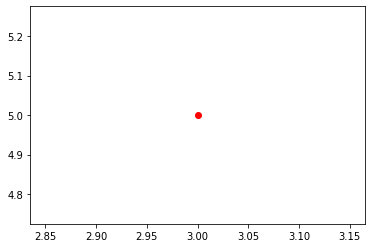

In [ ]:
x = 3
y = 5

plt.plot(x,y,'ro')
plt.show

###Classification Algirithm 1


##Conclusion